In [7]:
%pylab inline
from LMC_hernquist_a import a_value
from octopus import profiles
from pygadgetreader import readsnap
from astropy import units as u
from astropy import constants

Populating the interactive namespace from numpy and matplotlib


In [2]:
font = {'size':20, 'family':'serif'}
matplotlib.rc('font', **font)

In [3]:
# Mass models:
Mass = [3E10, 5E10, 8E10, 1E11, 1.8E11, 2.5E11]
# Enclosed Mass:
M_tot = 1.7E10

In [4]:
# Findig the scale length
a = zeros(len(Mass))
for i in range(len(Mass)):
    a[i] = (a_value(Mass[i], M_tot))

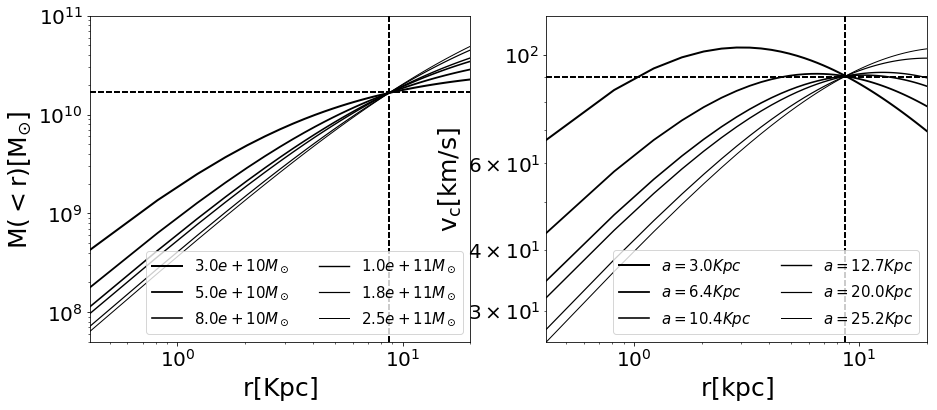

In [5]:
figsize(15,6)
r = np.linspace(0, 20)
for i in range(len(a)):
    M_r = profiles.mass_hernquist(a[i], r, Mass[i])
    v_r = profiles.vc_hernquist(a[i], r, 0, 0, Mass[i])
    subplot(1,2,1)
    loglog(r, M_r, c='k', lw=2-i/5.0, label='${:.1e} M_\odot$'.format(Mass[i]))
    axvline(8.7, ls='--', c='k')
    axhline(1.7E10, ls='--', c='k')
    xlim(0, 20)
    ylim(5E7, 1E11)
    xlabel('$\mathrm{r[Kpc]}$', fontsize=25)
    ylabel('$\mathrm{M(<r)[M_{\odot}]}$', fontsize=25)
    legend(ncol=2, fontsize=15, loc='lower right')
    
    subplot(1,2,2)
    loglog(r, v_r, c='k', lw=2-i/5.0, label='$a = {:.1f}Kpc$'.format(a[i]))
    axvline(8.7, ls='--', c='k')
    axhline(90, ls='--', c='k')
    xlim(0, 20)
    ylim(0, 120)
    legend(ncol=2, fontsize=15, loc='lower right')
    xlabel('$\mathrm{r[kpc]}$', fontsize=25)
    ylabel('$\mathrm{v_c[km/s]}$', fontsize=25)
savefig('LMC_models.png', dpi=100, bbox_inches='tight')

# Models from the N-body models

## GalIC ICs:

In [11]:
G = constants.G
H = 2.26854550263E-18 /u.s

def ICs(Mvir, a_halo):
    Mvir = Mvir * u.Msun
    a_halo = a_halo * u.kpc
    Vvir = ((Mvir*(6.9713 * H*G) )**(1/3.)).to(u.km / u.s)
    print('Vvir = ', Vvir)

    Rvir = (Vvir/(6.9713 * H)).to(u.kpc)
    print('Rvir = ', Rvir)

    CC = Rvir/a_halo
    print('CC = ', CC)

In [20]:
ICs(1E11, 12.7)

Vvir =  59.433488876875884 km / s
Rvir =  121.79218239034164 kpc
CC =  9.589935621286743


| LMC mass      | $V_{vir}\ (km/s) $      | $CC$  | 
| :-------------: |:--------------------:| :-----:| 
| MWLMC1 ($3\times10^{10} M_{\odot}$) | 39.78 | 27.17  | 
| MWLMC2 ($5\times10^{10} M_{\odot}$) | 47.17 | 15.10 |
| MWLMC3 ($8\times10^{10} M_{\odot}$) | 55.17 | 10.87  | 
| MWLMC4 ($10\times10^{10} M_{\odot}$) | 59.43 | 9.58 | 
| MWLMC5 ($18\times10^{10} M_{\odot}$) | 72.29 | 7.40 | 
| MWLMC6 ($25\times10^{10} M_{\odot}$) | 80.66 | 6.55 |

## LMC1 

In [27]:
print(a[0])

3.01850925463


In [12]:
LMC1_pos = readsnap('../data/ICs/LMC/LMC1_010', 'pos', 'dm')
LMC1_m = readsnap('../data/ICs/LMC/LMC1_010', 'mass', 'dm')

Returning DM    Positions
Returning DM    Mass


In [17]:
sum((LMC1_m))

2.9986155

In [19]:
vc = np.loadtxt('../data/ICs/LMC/rotcurve.txt')

    

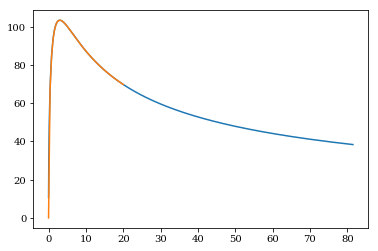

In [26]:
plot(vc[:,0], vc[:,1])
v_rLMC1 = profiles.vc_hernquist(a[0], r, 0, 0, Mass[0])
plot(r, v_rLMC1)
